# **A loja vende mais no verão? ⛵**

# Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from scipy.stats import zscore

#Coleta dos dados

In [ ]:
df = pd.read_csv("/content/compras_loja_praia.csv")

In [ ]:
df.head()

,id_compra,data_compra,cliente_id,idade_cliente,genero_cliente,produto,quantidade,preco_unitario,cidade
0,2e1821b8-e57f-4dfd-996e-a52fcf5adbfc,2024-04-15,f8df1734-6e2a-4b76-9fd9-ec6a73d55f91,54.0,Masculino,Óculos de Sol,3,68.12,NaN
1,d9692b2b-29be-4910-840c-81fc7376f6b6,2024-12-30,de6d9a23-1428-4c6f-bba2-74d09990618c,67.0,Outro,Rasteirinha,2,81.55,Lake Robertside
2,335cee92-3f98-42a5-8530-b5ceca1b034f,2023-08-28,8e46605c-c76c-455a-8b16-b841fbecf425,NaN,Feminino,Toalha de Praia,100,104.18,Michelleland
3,89825b18-98ee-465c-baaa-eb4b746934f0,2023-11-24,0ce7c912-6f92-4f70-9907-52d4f812e053,30.0,Masculino,Biquíni,5,143.24,NaN
4,6b92128b-0caf-4a20-ad07-f5f67e6511f0,2024-05-16,09a34955-ba0c-427d-a69a-20f0a94251d7,58.0,Masculino,Toalha de Praia,100,152.24,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10050 entries, 0 to 10049
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_compra       10050 non-null  object 
 1   data_compra     10050 non-null  object 
 2   cliente_id      10050 non-null  object 
 3   idade_cliente   5024 non-null   float64
 4   genero_cliente  7555 non-null   object 
 5   produto         10050 non-null  object 
 6   quantidade      10050 non-null  int64  
 7   preco_unitario  10050 non-null  float64
 8   cidade          5023 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 706.8+ KB


In [ ]:
df.describe()

,idade_cliente,quantidade,preco_unitario
count,5024.000000,10050.000000,10050.00000
mean,48.223328,39.355821,107.25190
std,75.296911,446.253014,53.73199
min,16.000000,1.000000,0.01000
25%,30.000000,2.000000,61.50250
50%,42.000000,4.000000,106.62000
75%,56.000000,5.000000,153.42000
max,999.000000,9999.000000,199.99000


# Observação dos dados

In [ ]:
df.isnull().sum()

,0
id_compra,0
data_compra,0
cliente_id,0
idade_cliente,5026
genero_cliente,2495
produto,0
quantidade,0
preco_unitario,0
cidade,5027


In [ ]:
df.duplicated().sum()

np.int64(50)

### Idade

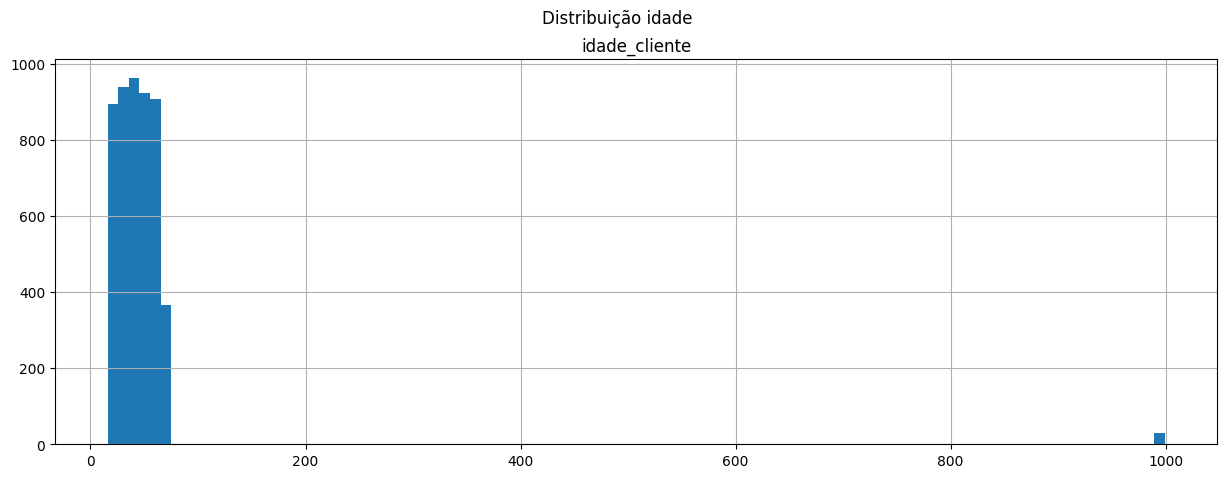

In [ ]:
df[["idade_cliente"]].hist(bins = 100, figsize=(15,5))
plt.suptitle("Distribuição idade")
plt.show()

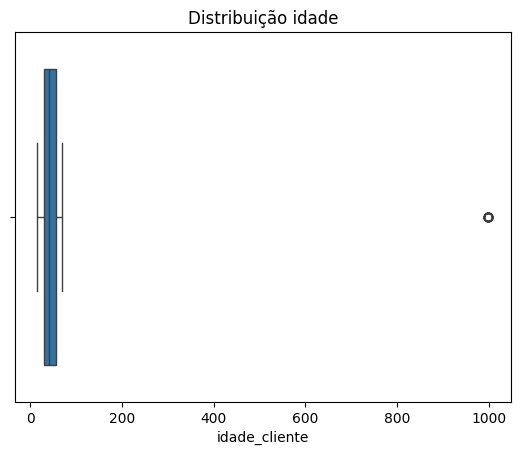

In [ ]:
sns.boxplot(x = df["idade_cliente"])
plt.title("Distribuição idade")
plt.show()

### Valor unitário

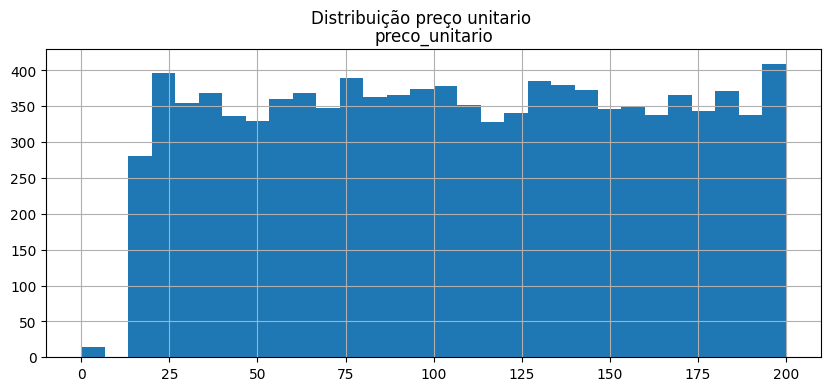

In [ ]:
df[["preco_unitario"]].hist(bins = 30, figsize=(10,4))
plt.suptitle("Distribuição preço unitario")
plt.show()

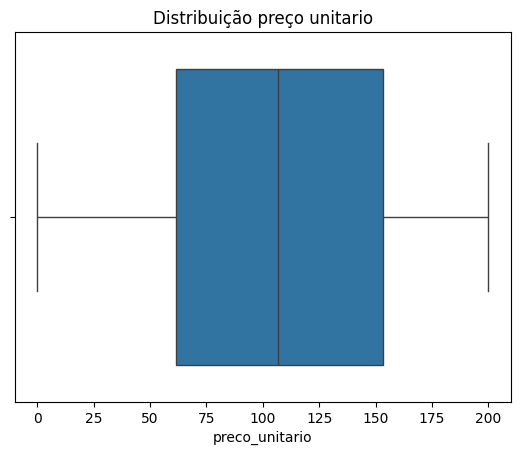

In [ ]:
sns.boxplot(x = df["preco_unitario"])
plt.title("Distribuição preço unitario")
plt.show()

### Quantidade

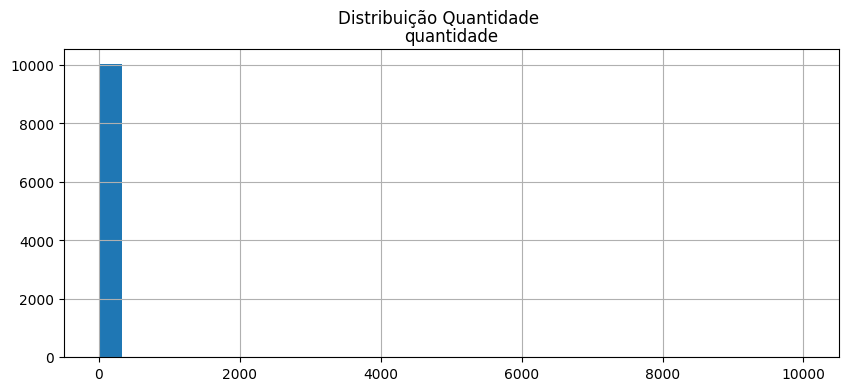

In [ ]:
df[["quantidade"]].hist(bins = 30, figsize=(10,4))
plt.suptitle("Distribuição Quantidade")
plt.show()

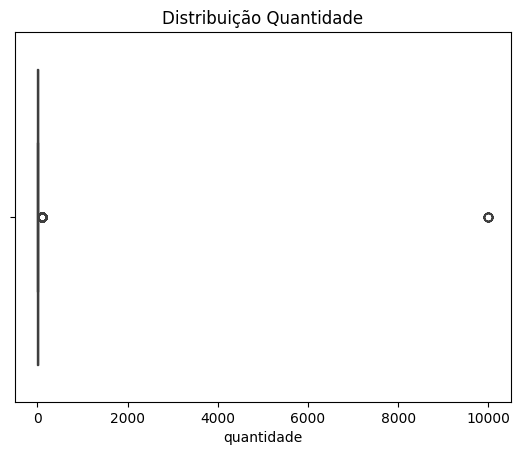

In [ ]:
sns.boxplot(x = df["quantidade"])
plt.title("Distribuição Quantidade")
plt.show()

# Tratamento



*   Arrumar data ✅
*   Replace de genero ✅
*   Tratar outlier de quantidade ✅
*   Tratar discrepância do preço unitário ✅



### Arrumar data

In [ ]:
df["data_compra_corrigido"] = pd.to_datetime(df["data_compra"], errors="coerce") #Corrigir tipo do campo data

### Replace de genero

In [ ]:
df["genero_cliente"] = df["genero_cliente"].fillna("Não informado") #Preenchimento de gênero ausentes com "Não informado"

### Outlier quantidade

In [ ]:
#Cálculo de oulier usando IQR

Q1 = df["quantidade"].quantile(0.25)
Q3 = df["quantidade"].quantile(0.75)
IQR = Q3 - Q1

limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

In [ ]:
# Avaliação da quantidade de outliers

df_outlier = df.copy()
df_outlier = df_outlier[(df_outlier["quantidade"] < limite_inferior) | (df_outlier["quantidade"] > limite_superior)]
df_outlier.info()

x = 1725/10050
x # Outliers representam mais de 17%, logo não podemos tirar por IQR

<class 'pandas.core.frame.DataFrame'>
Index: 1725 entries, 2 to 10043
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_compra              1725 non-null   object        
 1   data_compra            1725 non-null   object        
 2   cliente_id             1725 non-null   object        
 3   idade_cliente          847 non-null    float64       
 4   genero_cliente         1725 non-null   object        
 5   produto                1725 non-null   object        
 6   quantidade             1725 non-null   int64         
 7   preco_unitario         1725 non-null   float64       
 8   cidade                 871 non-null    object        
 9   data_compra_corrigido  1722 non-null   datetime64[ns]
 10  quantidade_zscore      1725 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 161.7+ KB


0.17164179104477612

In [ ]:
#2 tentativa - Cálculo de outlier usando zscore

df["quantidade_zscore"] = zscore(df["quantidade"])
df_outlier_z = df.copy()
df_outlier_z = df_outlier_z[df_outlier_z["quantidade_zscore"] > 3]
df_outlier_z.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 877 to 9289
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_compra              20 non-null     object        
 1   data_compra            20 non-null     object        
 2   cliente_id             20 non-null     object        
 3   idade_cliente          5 non-null      float64       
 4   genero_cliente         20 non-null     object        
 5   produto                20 non-null     object        
 6   quantidade             20 non-null     int64         
 7   preco_unitario         20 non-null     float64       
 8   cidade                 9 non-null      object        
 9   data_compra_corrigido  20 non-null     datetime64[ns]
 10  quantidade_zscore      20 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 1.9+ KB


In [ ]:
#Retirar outliers de quantidade com Zscore
df = df[df["quantidade_zscore"] < 3]
df.describe()

,idade_cliente,quantidade,preco_unitario,data_compra_corrigido,quantidade_zscore
count,5019.000000,10030.000000,10030.000000,10010,10030.000000
mean,48.226141,19.496112,107.238614,2024-04-25 04:58:47.352647424,-0.044505
min,16.000000,1.000000,0.010000,2023-04-23 00:00:00,-0.085955
25%,30.000000,2.000000,61.492500,2023-10-26 00:00:00,-0.083714
50%,42.000000,4.000000,106.620000,2024-04-26 00:00:00,-0.079232
75%,56.000000,5.000000,153.420000,2024-10-26 00:00:00,-0.076991
max,999.000000,100.000000,199.990000,2025-04-22 00:00:00,0.135903
std,75.332075,36.456511,53.738783,NaN,0.081699


### Arrumar discrepâncias de preço unitário

In [ ]:
df["preco_unitario"].describe()

,preco_unitario
count,10030.000000
mean,107.238614
std,53.738783
min,0.010000
25%,61.492500
50%,106.620000
75%,153.420000
max,199.990000


In [ ]:
#Cálculo de oulier usando IQR

Q1 = df["preco_unitario"].quantile(0.25)
Q3 = df["preco_unitario"].quantile(0.75)
IQR = Q3 - Q1

limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

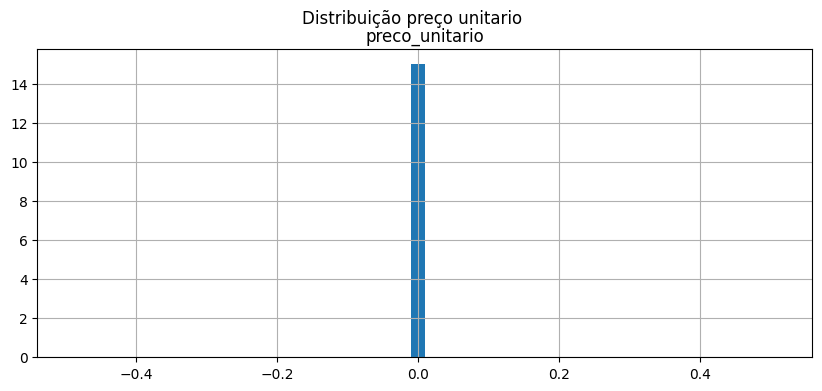

In [ ]:
#Verificar a discrepância

df_zoom_25 = df.copy()
df_zoom_25 = df_zoom_25[(df_zoom_25["preco_unitario"] < 1)]

df_zoom_25[["preco_unitario"]].hist(bins = 50, figsize=(10,4))
plt.suptitle("Distribuição preço unitario")
plt.show()

In [ ]:
#Replace de discrepancias (valor = 0.01 centavos) por Q1 do preço unitário

df['preco_unitario'] = df['preco_unitario'].replace(0.01, Q1)

### Limpar ausentes da data

In [ ]:
df = df.dropna(subset=["data_compra_corrigido"])

# EDA



*   Vende mais no verão? Sim
*   O que muda do verão pra outras estação? Os clientes compram em maior quantidade



In [ ]:
df.columns

Index(['id_compra', 'data_compra', 'cliente_id', 'idade_cliente',
       'genero_cliente', 'produto', 'quantidade', 'preco_unitario', 'cidade',
       'data_compra_corrigido', 'quantidade_zscore'],
      dtype='object')

In [ ]:
#Gerar o dtaframe tratado só com colunas úteis

df_tratado = df[['id_compra','cliente_id', 'produto', 'quantidade', 'preco_unitario','data_compra_corrigido']]

In [ ]:
# Criar a coluna de mês pra definir a estação

df_tratado["mes"] = df_tratado["data_compra_corrigido"].dt.month
df_tratado["ano"] = df_tratado["data_compra_corrigido"].dt.year

<ipython-input-103-88cb78dba83a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tratado["mes"] = df_tratado["data_compra_corrigido"].dt.month
<ipython-input-103-88cb78dba83a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tratado["ano"] = df_tratado["data_compra_corrigido"].dt.year


In [ ]:
#Criar coluna de estção com base no mês do hemisfério sul (hipótese)
df_tratado["estacao"] = df_tratado["mes"].map({6: "Inverno", 7: "Inverno", 8: "Inverno", 9: "Primavera",
                                       10: "Primavera", 11: "Primavera", 12: "Verão",
                                       1: "Verão", 2: "Verão", 3: "Outono", 4: "Outono", 5: "Outono",})

<ipython-input-106-48ed0c90a628>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tratado["estacao"] = df_tratado["mes"].map({6: "Inverno", 7: "Inverno", 8: "Inverno", 9: "Primavera",


In [ ]:
#Criar coluan do valor total vendido pra análise
df_tratado["valor_total"] = df_tratado["quantidade"] * df_tratado["preco_unitario"]

<ipython-input-109-bbfc8ae4dc83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tratado["valor_total"] = df_tratado["quantidade"] * df_tratado["preco_unitario"]


In [ ]:
df_tratado.head()

,id_compra,cliente_id,produto,quantidade,preco_unitario,data_compra_corrigido,mes,ano,estacao,valor_total
0,2e1821b8-e57f-4dfd-996e-a52fcf5adbfc,f8df1734-6e2a-4b76-9fd9-ec6a73d55f91,Óculos de Sol,3,68.12,2024-04-15,4,2024,Outono,204.36
1,d9692b2b-29be-4910-840c-81fc7376f6b6,de6d9a23-1428-4c6f-bba2-74d09990618c,Rasteirinha,2,81.55,2024-12-30,12,2024,Verão,163.10
2,335cee92-3f98-42a5-8530-b5ceca1b034f,8e46605c-c76c-455a-8b16-b841fbecf425,Toalha de Praia,100,104.18,2023-08-28,8,2023,Inverno,10418.00
3,89825b18-98ee-465c-baaa-eb4b746934f0,0ce7c912-6f92-4f70-9907-52d4f812e053,Biquíni,5,143.24,2023-11-24,11,2023,Primavera,716.20
4,6b92128b-0caf-4a20-ad07-f5f67e6511f0,09a34955-ba0c-427d-a69a-20f0a94251d7,Toalha de Praia,100,152.24,2024-05-16,5,2024,Outono,15224.00


In [ ]:
#Análise de valor vendido por estação
vendas_estacao = df_tratado.groupby("estacao")["valor_total"].sum()
vendas_estacao

,valor_total
estacao,
Inverno,4.990831e+06
Outono,5.294941e+06
Primavera,5.134211e+06
Verão,5.404102e+06


In [ ]:
#Análise de quantidade de compradores por estação
clientes_estacao = df_tratado.groupby("estacao")["cliente_id"].nunique()
clientes_estacao

,cliente_id
estacao,
Inverno,2473
Outono,2538
Primavera,2475
Verão,2474


In [ ]:
#Análise de ticket médio por estação
ticket_estacao = df_tratado.groupby("estacao")["valor_total"].mean()
ticket_estacao

,valor_total
estacao,
Inverno,2006.767586
Outono,2079.709648
Primavera,2061.104343
Verão,2173.814287


In [ ]:
#Análise de quantidade de itens compradas por estação
quantidade_estacao = df_tratado.groupby("estacao")["quantidade"].mean()
quantidade_estacao

,quantidade
estacao,
Inverno,19.594290
Outono,19.309505
Primavera,19.004014
Verão,20.096943


In [ ]:
#Análise de ticket médio por estação
preco_estacao = df_tratado.groupby("estacao")["preco_unitario"].mean()
preco_estacao

,preco_unitario
estacao,
Inverno,107.531356
Outono,109.054142
Primavera,104.983060
Verão,107.941101


# Lição de casa  🏆

* Verificar que genêro mais comprou
* Extra: Verificar em que estação estão os outliers que não retiramos